In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [73]:
features1 = pd.read_csv('/home/dan/Bird/Analysis/feature_vector.csv',header = None,names=["sound.files","selec","duration","meanfreq","sd","freq.median","freq.Q25","freq.Q75","freq.IQR","time.median","time.Q25","time.Q75","time.IQR","skew","kurt","sp.ent","time.ent","entropy","sfm","meandom","mindom","maxdom","dfrange","modindx","startdom","enddom","dfslope","meanpeakf"
])
metadata1 = pd.read_csv('/home/dan/Bird/Analysis/USA_Texas_A.csv', encoding = "ISO-8859-1")

In [108]:
def add_metadata(metadata, features):
   names = [x.split("-") for x in features['sound.files']]
   ids = [int(x[2].replace(".wav",'')) for x in names]
   ordered_metadata = pd.DataFrame()
   for i in ids:
       df = metadata[metadata.Recording_ID == i]
       ordered_metadata = ordered_metadata.append(df,ignore_index=True)
   X = ordered_metadata.join(features)
   good_rows = features.iloc[:,1:].apply(lambda x : not np.any(np.isnan(x)), axis = 1)
   mystery_rows = [x[1] == "mystery" for x in names]
   return X[[a and not b for a,b in zip(good_rows,mystery_rows)]]

In [109]:
good_boi1 = add_metadata(metadata1,features1)

type(good_boi1)

pandas.core.frame.DataFrame

In [70]:
good_boi1.columns


Index(['Recording_ID', 'Genus', 'Specific_epithet', 'Subspecies',
       'English_name', 'Recordist', 'Country', 'Locality', 'Latitude',
       'Longitude', 'Vocalization_type', 'Audio_file', 'License', 'Url',
       'Quality', 'Time', 'Date', 'sound.files', 'selec', 'duration',
       'meanfreq', 'sd', 'freq.median', 'freq.Q25', 'freq.Q75', 'freq.IQR',
       'time.median', 'time.Q25', 'time.Q75', 'time.IQR', 'skew', 'kurt',
       'sp.ent', 'time.ent', 'entropy', 'sfm', 'meandom', 'mindom', 'maxdom',
       'dfrange', 'modindx', 'startdom', 'enddom', 'dfslope', 'meanpeakf'],
      dtype='object')

In [76]:
X=good_boi1.loc[:,['meanfreq', 'sd', 'freq.median', 'freq.Q25', 'freq.Q75', 'freq.IQR',
       'skew', 'kurt','sp.ent', 'time.ent', 'entropy', 'sfm', 'meandom', 'mindom', 'maxdom',
       'dfrange', 'modindx', 'startdom', 'enddom', 'dfslope', 'meanpeakf']]
Y=good_boi1['English_name']

In [77]:
X.shape

(5166, 21)

In [78]:
names=good_boi1.English_name

In [79]:
y = names.astype("category").cat.codes

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, stratify=y)


## For Original Data

### Linear regression

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.012229688807762207

### K- nearest neighbours


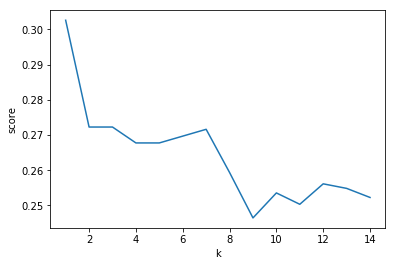

In [81]:
from sklearn.neighbors import KNeighborsClassifier 
scores = {}

for k in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores[k] = knn.score(X_test, y_test)

plt.plot([float(y) for y in scores.keys()], [float(x) for x in scores.values()])
plt.xlabel('k')
plt.ylabel('score')
plt.show()

In [34]:
from sklearn import metrics
predicted = knn.predict(X_test)
metrics.classification_report(y_test, predicted)

/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         1\n           1       0.09      0.11      0.10         9\n           2       0.17      0.40      0.24         5\n           3       0.23      0.38      0.29         8\n           4       0.10      0.33      0.15         3\n           5       0.00      0.00      0.00         2\n           6       0.00      0.00      0.00         2\n           7       1.00      0.50      0.67         2\n           8       0.17      0.20      0.18         5\n           9       0.00      0.00      0.00         5\n          10       0.10      0.14      0.12         7\n          11       0.00      0.00      0.00         1\n          12       0.00      0.00      0.00         2\n          13       0.17      0.33      0.22         3\n          14       0.00      0.00      0.00         1\n          15       0.00      0.00      0.00         6\n          16       0.00      0.00      0.00         1\n       

In [ ]:
metrics.confusion_matrix(y_test, predicted)

In [82]:
from sklearn.svm import SVC
model = SVC(kernel="linear", C=0.025)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.3258064516129032


In [83]:
from sklearn.svm import SVC
model = SVC(gamma=0.05, C=5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.34


In [84]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.3638709677419355


In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


KeyboardInterrupt: 

In [39]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.31843575418994413


In [40]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC(kernel='linear')).fit(X_train, y_train)
print(model.score(X_test, y_test))

0.2905027932960894


In [60]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC(kernel='poly')).fit(X_train, y_train)
print(model.score(X_test, y_test))

KeyboardInterrupt: 

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
model = OneVsOneClassifier(SVC(kernel='poly',gamma='auto')).fit(X_train, y_train)
print(model.score(X_test, y_test))

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
model = OneVsOneClassifier(SVC(kernel='linear',gamma='auto')).fit(X_train, y_train)
print(model.score(X_test, y_test))

In [42]:
var=np.var(X,axis=0)
var

meanfreq          0.940415
sd                0.299056
freq.median       1.324306
freq.Q25          0.842573
freq.Q75          2.778496
freq.IQR          2.104349
skew             15.222455
kurt           7202.059486
sp.ent            0.009857
time.ent          0.000450
entropy           0.008998
sfm               0.030360
meandom           1.417921
mindom            1.202714
maxdom            2.849265
dfrange           2.225645
modindx           1.037679
startdom          1.776609
enddom            1.804933
dfslope          67.840383
meanpeakf         1.847416
dtype: float64

In [43]:
import numpy as np
mean_bird = np.mean(X, axis=0)
mean_bird

meanfreq        3.732862
sd              1.946468
freq.median     3.211067
freq.Q25        2.573352
freq.Q75        4.244285
freq.IQR        1.670932
skew            6.329088
kurt           68.287240
sp.ent          0.811297
time.ent        0.939716
entropy         0.762342
sfm             0.331584
meandom         2.862249
mindom          2.280243
maxdom          3.559410
dfrange         1.279166
modindx         2.186181
startdom        2.726660
enddom          2.796137
dfslope         0.481046
meanpeakf       2.765378
dtype: float64

## We are doing SVD and only keeping dominant vectors


In [86]:
import numpy as np
from sklearn import preprocessing
XX=preprocessing.normalize(X)
U, s, V = np.linalg.svd(XX)


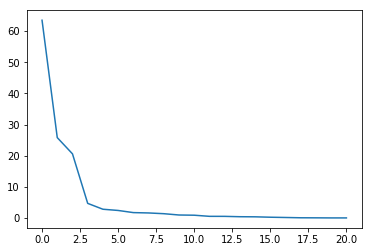

In [87]:
plt.plot(s)
plt.show()

In [98]:
s[6:] = 0
S = np.zeros(X.shape)
S[:len(s), :len(s)] = np.diag(s)
US = np.matmul(U,S)
Xp = np.matmul(np.matmul(U,S),V)


In [89]:
US.shape

(5166, 21)

<IPython.core.display.Javascript object>


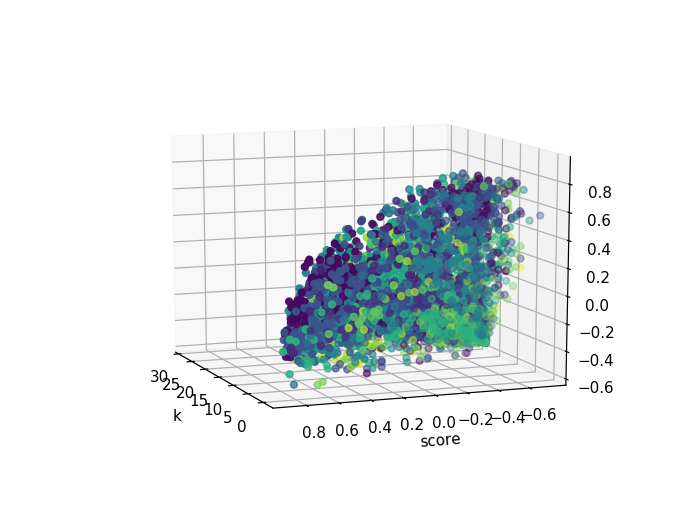

In [92]:
%matplotlib notebook
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(US[:,0],US[:,1],US[:,2], c=y )
plt.show()

In [101]:
Xp_train, Xp_test, yp_train, yp_test = train_test_split(US[:,[0,1,2]],y, test_size = 0.3, stratify=y)

In [102]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
model = OneVsOneClassifier(SVC(kernel='linear',gamma='auto')).fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.10709677419354839


In [103]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
model = OneVsOneClassifier(SVC(kernel='poly',gamma='auto')).fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.08774193548387096


In [50]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC(kernel='linear',gamma='auto')).fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.0111731843575419


In [51]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC(kernel='poly',gamma='auto')).fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.0223463687150838


In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(Xp_train,yp_train)
model.score(Xp_test,yp_test)

0.0018884019038197808

In [53]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(Xp_train, yp_train)
print(knn.score(Xp_test, yp_test))

0.12290502793296089


In [54]:
from sklearn.svm import SVC
model = SVC(kernel="linear", C=0.025)
model.fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.05307262569832402


In [55]:
from sklearn.svm import SVC
model = SVC(gamma=0.05, C=5)
model.fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.10614525139664804


In [107]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.12451612903225806


In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=10000)
model.fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

/home/dan/miniconda3/envs/hic-param-est/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.10335195530726257


In [106]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
model.fit(Xp_train, yp_train)
print(model.score(Xp_test, yp_test))

0.12064516129032259


<IPython.core.display.Javascript object>


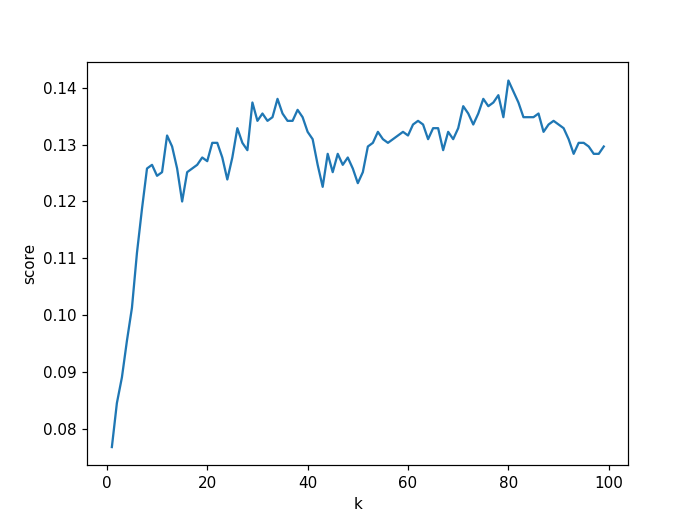

In [105]:
scores = {}

for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xp_train, yp_train)
    scores[k] = knn.score(Xp_test, yp_test)

plt.plot([float(y) for y in scores.keys()], [float(x) for x in scores.values()])
plt.xlabel('k')
plt.ylabel('score')
plt.show()